<a href="https://colab.research.google.com/github/andrewwgordon/NASA_C-MAPSS/blob/main/NASA_C_MAPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd

In [37]:
from google import colab
dir_path = './CMaps/'
column_names = [
    'unit',
    'cycles',
    'altitude',
    'air_speed',
    'throttle_angle'
]
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
column_names = column_names + sensor_names
fd001_train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header = None, names = column_names)

In [38]:
fd001_train.head()

,unit,cycles,altitude,air_speed,throttle_angle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


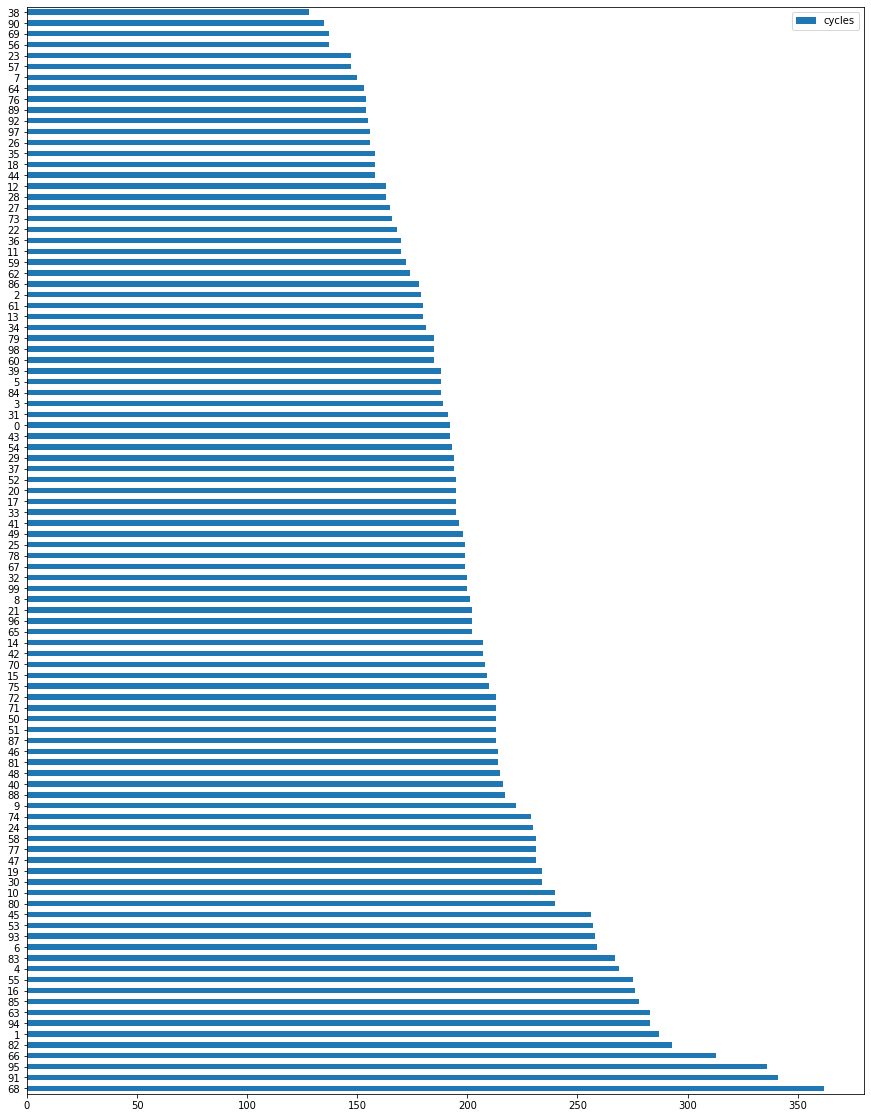

In [55]:
fd001_train.groupby(['unit'])['cycles'].max().reset_index().sort_values(['cycles'],ascending=False).plot.barh(y='cycles',figsize=(15,20))

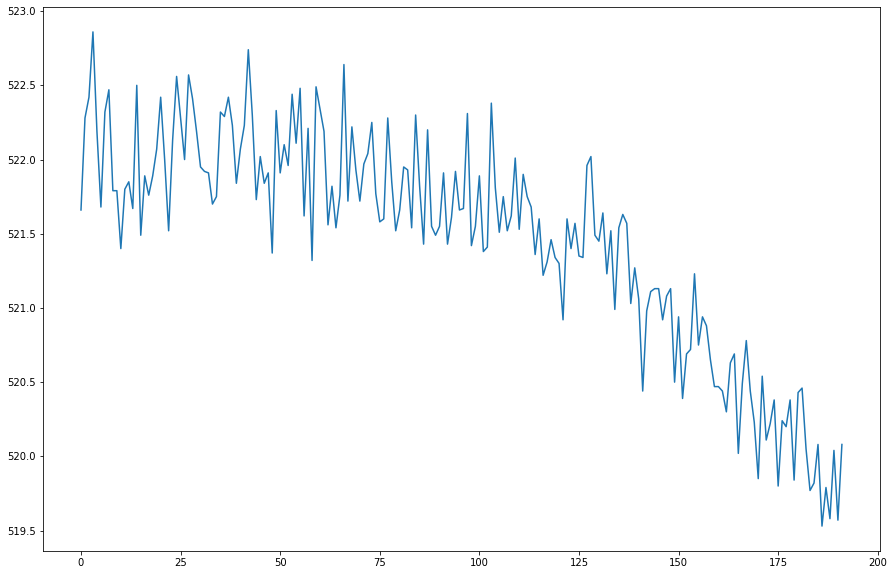

In [61]:
fd001_train[fd001_train['unit']==1]['sensor_12'].plot(figsize=(15,10))